In [126]:
import numpy as np
import pandas as pd

In [127]:
df = pd.read_csv("Student_Performance.csv")
print(df.head())
print(df.shape)

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
(10000, 6)


In [223]:
y = np.array(df.loc[:, "Performance Index"])
x = np.array(df.drop("Performance Index", axis=1))
x = np.where(x == "Yes", 1, x)
x = np.where(x == "No", 0, x)
x

array([[7, 99, 1, 9, 1],
       [4, 82, 0, 4, 2],
       [8, 51, 1, 7, 2],
       ...,
       [6, 83, 1, 8, 5],
       [9, 97, 1, 7, 0],
       [7, 74, 0, 8, 1]], dtype=object)

In [224]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
print(type(x_train))
print(type(y_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [226]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_test

array([[ 0.38344671,  0.20977503, -0.98930717,  0.27828975, -0.90767917],
       [-1.54803147,  1.13123018,  1.01080841,  0.27828975, -0.90767917],
       [-0.7754402 ,  1.59195776,  1.01080841,  0.87023816, -1.60727292],
       ...,
       [-0.7754402 ,  0.84327544, -0.98930717,  1.46218657, -1.60727292],
       [-0.00284893, -1.4027715 , -0.98930717,  0.27828975, -0.90767917],
       [-1.54803147, -0.76927108,  1.01080841,  0.87023816,  0.14171146]])

In [227]:
class linear_regression:
    # batch gradient descent training
    def __init__(self):
        self.w1 = np.array([])

    def fit(self, **kwargs):
        """
        linear regression function..
        """
        nt, nf = kwargs["x"].shape
        if "w" in kwargs.items():
            self.w1 = np.array(kwargs["w"])
        else:
            self.w1 = np.zeros(nf + 1)
        x_train = np.array(kwargs["x"])
        y_train = np.array(kwargs["y"])
        alpha = kwargs["alpha"]
        iter = kwargs["no_of_iterations"]

        if len(x_train) != len(y_train) or (len(self.w1) != (len(x_train[0]) + 1)):
            raise TypeError(
                f"paramters provided does not have compatible size{len(x_train)}, {len(y_train)}"
            )

        cnt = 0
        while cnt < iter:
            error = np.array([])
            for i in range(len(x_train)):
                x = np.array(x_train[i])
                x = np.append(x, 1.0)
                y_true = y_train[i]
                y_pred = np.dot(x, self.w1)
                error = np.append(error, y_pred - y_true)

            for i in range(len(self.w1)):
                if i == (len(self.w1) - 1):
                    val = (2 * error.sum()) / nt
                else:
                    if x_train[0][i] == "Yes" or x_train[0][i] == "No":
                        x = x_train[:, i]
                        val = (2 * np.dot(x, error)) / nt
                    else:
                        x = x_train[:, i]
                        val = (2 * np.dot(x, error)) / nt

                self.w1[i] = self.w1[i] - alpha * val
            print(self.w1)
            cnt += 1

    def predict(self, **kwargs):
        """ """
        x = kwargs["x"]
        y_pred = np.array([])
        for i in x:
            x_input = np.array(i)
            x_input = np.append(x_input, 1)

            y_pred = np.append(y_pred, np.dot(self.w1, x_input))
        return y_pred

In [228]:
model = linear_regression()
model.fit(x=x_train, y=y_train, alpha=0.01, no_of_iterations=500)
y_pred = model.predict(x=x_test)

[0.14294085 0.35197277 0.00904358 0.01830958 0.01551466 1.1037725 ]
[0.28311836 0.69694136 0.01784532 0.03621014 0.0306259  2.18546955]
[0.42058593 1.03504521 0.02641127 0.05371069 0.04534363 3.24553266]
[0.55539594 1.36642096 0.03474735 0.07082004 0.05967749 4.28439451]
[0.68759977 1.69120256 0.0428593  0.08754681 0.07363694 5.30247912]
[0.81724778 2.00952127 0.05075277 0.10389945 0.08723117 6.30020203]
[0.94438937 2.32150573 0.05843324 0.11988619 0.10046918 7.27797049]
[1.06907298 2.62728203 0.06590606 0.13551512 0.11335974 8.23618358]
[1.19134614 2.92697376 0.07317646 0.15079412 0.12591143 9.17523241]
[ 1.31125542  3.22070203  0.08024956  0.16573092  0.13813262 10.09550026]
[ 1.42884652  3.50858555  0.08713032  0.18033307  0.15003148 10.99736276]
[ 1.54416424  3.79074066  0.09382361  0.19460797  0.16161597 11.881188  ]
[ 1.65725253  4.06728137  0.10033416  0.20856283  0.17289389 12.74733674]
[ 1.76815448  4.33831946  0.10666662  0.22220474  0.18387283 13.59616251]
[ 1.87691235  4.60

In [229]:
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

error = root_mean_squared_error(y_pred, y_test)
print(error)

2.0551567273978373


In [230]:
print(y_pred)
print(y_test)
print(model.w1)

[61.1717811  63.79535659 77.75780821 ... 64.39004284 29.78602764
 31.21202182]
[58. 64. 75. ... 67. 33. 33.]
[ 7.39205227 17.69265911  0.29906832  0.80511543  0.53840707 55.18636094]


In [220]:
for i in model.w1:
    print(i)

0.0
0.0
0.4521602967855839
0.0
0.0
55.18636094266778


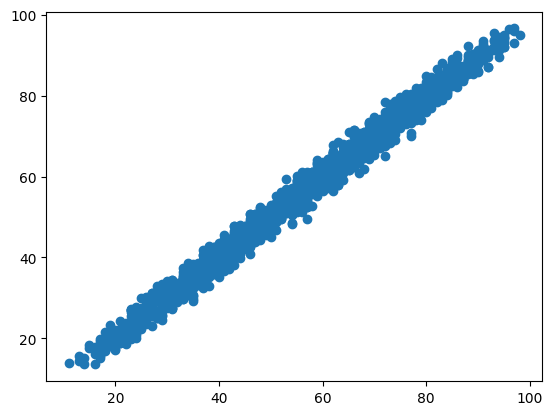

In [233]:
plt.scatter(y_test, y_pred)

In [234]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.9884865638196577
